#Bibliotecas


In [ ]:
#Bibliotecas Aqui!
import math
from termcolor import colored, cprint
import scipy.integrate as integrate

# Métodos

In [ ]:
#Métodos Aqui!

In [ ]:
def pythonIntegral(f, min, max):
  return integrate.quad(f, min, max)[0]

def trapezoidalRule(n, min, max, f):
  sum = f(0)
  h = (max - min)/n
  i = h
  
  while (i < max):
    sum += 2*f(i)
    i += h

  sum += f(i)
  
  result = (h/2)*sum
  return result


def simpson13(n, min, max, f):
  sum = f(0)
  h = (max - min)/n
  i = h

  while (i < max-h):
    sum += 4*f(i) + 2*f(i+h)
    i += 2*h
  
  sum += 4*f(i) + f(i+h)
  
  result = (h/3)*sum
  return result


def simpson38(n, min, max, f):
  h = (max - min)/n

  sum = f(max - 3*h) + 3 * ( f(max - 2*h) + f(max - h) ) + f(max)
  result = ((3*h)/8) * sum

  n -= 3

  if (n > 1):
    result += simpson13(n-1, min, max - 4*h, f)
  
  return result


def relativePercentualError(analyticalValue, estimatedValue):
  return math.fabs( ((analyticalValue - estimatedValue)/estimatedValue)*100 )


def centeredDifferentiation2(h, x, y):
  firstDerivative = (y(x+h) - y(x-h))/(2*h)
  secondDerivative = (y(x+h) - 2*y(x) + y(x-h))/(h**2)

  return firstDerivative, secondDerivative


def centeredDifferentiation4(h, x, y):
  firstDerivative = (-y(x+2*h) + 8*y(x+h) - 8*y(x-h) + y(x-2*h))/(12*h)
  secondDerivative = (-y(x+2*h) + 16*y(x+h) - 30*y(x) + 16*y(x-h) - y(x-2*h))/(12*h**2)

  return firstDerivative, secondDerivative


def printTitle(title):
  print(colored(title, 'yellow', attrs=['bold'])) 


def printItem(item):
  print(colored(item, 'green'))



# Lista de Exercício 5




##Questão 1 – Calcule a seguinte integral:

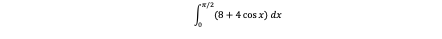

1. analiticamente
2. por uma única aplicação da regra do Trapézio
3. por aplicações múltiplas da regra do Trapézio, com n = 2 e 4;
4. uma única aplicação da regra 1/3 de Simpson;
5. aplicação múltipla da regra 1/3 de Simpson, com n = 4; 
6. uma única aplicação da regra 3/8 de Simpson;
7. aplicação múltipla da regra 3/8 de Simpson, com n = 5. 


Para cada estimativa numérica de (b) a (g), determine o erro relativo percentual com base em (a).



In [ ]:
f = lambda x: (8 + 4*(math.sin(x)))
min = 0
max = math.pi/2

#analyticalValue = 4*(math.pi + 1)
analyticalValue = pythonIntegral(f, min, max)
printItem("Valor do cálculo da integral analiticamente(a): " + str (analyticalValue))

printTitle("\n(b) Regra do Trapézio")
result = trapezoidalRule(1, min, max, f)
printItem("Resultado: %10.5f" % result)
printItem("Erro: %14.5f" % (relativePercentualError(analyticalValue, result)) + " %")



printTitle("\n(c) Regra do Trapézio; n=2")
result = trapezoidalRule(2, min, max, f)
printItem("Resultado: %10.5f" % result)
printItem("Erro: %14.5f" % (relativePercentualError(analyticalValue, result)) + " %")



printTitle("\n(c) Regra do Trapézio; n=4")
result = trapezoidalRule(4, min, max, f)
printItem("Resultado: %10.5f" % result)
printItem("Erro: %14.5f" % (relativePercentualError(analyticalValue, result)) + " %")



printTitle("\n(d) Regra 1/3 de Simpson")
result = simpson13(2, min, max, f)
printItem("Resultado: %10.5f" % result)
printItem("Erro: %14.5f" % (relativePercentualError(analyticalValue, result)) + " %")



printTitle("\n(e) Regra 1/3 de Simpson; n=4")
result = simpson13(4, min, max, f)
printItem("Resultado: %10.5f" % result)
printItem("Erro: %14.5f" % (relativePercentualError(analyticalValue, result)) + " %")



printTitle("\n(f) Regra 3/8 de Simpson")
result = simpson38(3, min, max, f)
printItem("Resultado: %10.5f" % result)
printItem("Erro: %14.5f" % (relativePercentualError(analyticalValue, result)) + " %")


printTitle("\n(g) Regra 3/8 de Simpson; n=5")
result = simpson38(5, min, max, f)
printItem("Resultado: %10.5f" % result)
printItem("Erro: %14.5f" % (relativePercentualError(analyticalValue, result)) + " %")



Valor do cálculo da integral analiticamente(a): 16.56637061435917

(b) Regra do Trapézio
Resultado:   15.70796
Erro:        5.46479 %

(c) Regra do Trapézio; n=2
Resultado:   16.35861
Erro:        1.27005 %

(c) Regra do Trapézio; n=4
Resultado:   16.51483
Erro:        0.31206 %

(d) Regra 1/3 de Simpson
Resultado:   16.57549
Erro:        0.05502 %

(e) Regra 1/3 de Simpson; n=4
Resultado:   16.56691
Erro:        0.00325 %

(f) Regra 3/8 de Simpson
Resultado:   16.57039
Erro:        0.02426 %

(g) Regra 3/8 de Simpson; n=5
Resultado:   16.56682
Erro:        0.00269 %


Como podemos observar pela porcentagem de erros para cada um dos métodos, todos parecem ter performado relativamente bem, obtendo valores próximos ao valor real/ obtido por integração analítica, com um erro máximo  menor a 5,5% no pior dos casos para os métodos aplicados.

Além do mais é notável que, para a integral aqui utilizada, um número maior de passos para todos os métodos aplicados(trapézio, Simpson 1/3 e Simpson 3/8) resultou em erros percentuais menores em relação ao resultado da integral obtido analiticamente, com o maior erro sendo encontrado na aplicação de um passo apenas na regra do trapézio.

##Questão 2 – Use aproximações por diferenças centradas para obter estimativas para a primeira e a segunda derivadas de y = e^x em x = 2 para h = 0,1. Empregue tanto fórmulas de ordem de O(h^2) como de ordem O(h^4) para suas estimativas. 

In [ ]:
y = lambda x : math.exp(x)
x = 2;
h = 0.1

printItem("Primeira derivada: %10.5f" % math.exp(2))
printItem("Segunda derivada: %11.5f" % math.exp(2))


firstD, secondD = centeredDifferentiation2(h, x, y)
printItem("\n\nEstimativa da primeira derivada; O(H²): %10.5f" % (firstD))
printItem("Estimativa da segunda derivada; O(H²): %11.5f" % (secondD))

firstD, secondD = centeredDifferentiation4(h, x, y)
printItem("\n\nEstimativa da primeira derivada; O(H⁴): %10.5f" % (firstD))
printItem("Estimativa da segunda derivada; O(H⁴): %11.5f" % (secondD))

Primeira derivada:    7.38906
Segunda derivada:     7.38906


Estimativa da primeira derivada; O(H²):    7.40138
Estimativa da segunda derivada; O(H²):     7.39522


Estimativa da primeira derivada; O(H⁴):    7.38903
Estimativa da segunda derivada; O(H⁴):     7.38905


Ao aplicar aproximações por diferenças centradas para obter estimativas para a primeira e a segunda derivadas de e^x também obtivemos resultados satisfatórios, tanto ao aplicar fórmulas de ordem O(h²) quanto de ordem O(h⁴) para as estimativas, sendo os valores obtidos ao aplicar fórmulas de ordem O(h⁴) mais próximos do resultado real da derivada de e^x(cuja derivada é e^x e, portanto, igual para ambas primeira e segunda derivadas) que os valores obtidos com fórmulas de O(h²), como era esperado, visto que, como o tamanho do passo h é menor que 1 e as estimativas de erros são proporcionais ao argumento de O(), h⁴ será menor que h² por se tratar de um número maior de multiplicações de um h menor que 1 por ele mesmo, i.e., teremos uma estimativa de erro menor em h⁴ que em h², no melhor dos casos.

Sendo os valores da primeira e da segunda derivada iguais na teoria, pois a derivada de e^x é e^x, também é possível observar que, a medida em que aplicamos derivadas de maior ordem a y, mais próximo fica o valor estimado pela aproximação por diferenças centradas do valor real de e^x.